### Capstone 3: Customer Segmentation
1. Data loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Development
5. Training
6. Evaluation
7. Visualization

In [230]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from imblearn.over_sampling import RandomOverSampler

In [196]:
# 1. Load datasets with pandas
df =  pd.read_csv("train.csv")

In [197]:
# 2. EDA
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [199]:
label_counts = df['term_deposit_subscribed'].value_counts()
ratio_0_to_1 = int(label_counts[0] / label_counts[1])
print(f"Ratio of class 0 to class 1: 1:{ratio_0_to_1}")

Ratio of class 0 to class 1: 1:8


In [200]:
# 3. Data Preprocessing
# Check missing Value
df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [201]:
# Fill missing values for object columns with 'unknown'
df['job_type'].fillna('unknown', inplace=True)
df['marital'].fillna('unknown', inplace=True)
df['personal_loan'].fillna('unknown', inplace=True)
df['communication_type'].fillna('unknown', inplace=True)
df['prev_campaign_outcome'].fillna('unknown', inplace=True)


In [202]:
from scipy.stats import skew

# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    skewness = skew(df[column].dropna())
    print(f'Skewness of {column}: {skewness}')

Skewness of customer_age: 0.661921067270835
Skewness of balance: 8.504718995807108
Skewness of day_of_month: 0.0919046338609211
Skewness of last_contact_duration: 3.1657174671691246
Skewness of num_contacts_in_campaign: 4.999933747882336
Skewness of days_since_prev_campaign_contact: 0.6493105581078642
Skewness of num_contacts_prev_campaign: 45.83083438051441
Skewness of term_deposit_subscribed: 2.5386068677139697


In [203]:
# Fill missing values for symmetric or approximately symmetric columns with mean
df['day_of_month'].fillna(df['day_of_month'].mean(), inplace=True)
df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
df['days_since_prev_campaign_contact'].fillna(df['days_since_prev_campaign_contact'].mean(), inplace=True)

# Fill missing values for highly skewed columns with median
df['balance'].fillna(df['balance'].median(), inplace=True)
df['last_contact_duration'].fillna(df['last_contact_duration'].median(), inplace=True)
df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].median(), inplace=True)
df['num_contacts_prev_campaign'].fillna(df['num_contacts_prev_campaign'].median(), inplace=True)

In [204]:
# Check missing Value
df.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [205]:
# Check duplicated value
df.duplicated().sum()

0

In [206]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31647.0,40.439216,10.645723,18.0,32.000000,39.000000,48.000000,97.0
balance,31647.0,1356.524599,3067.545042,-8020.0,75.000000,449.000000,1394.000000,102128.0
day_of_month,31647.0,15.818561,8.322970,1.0,8.000000,16.000000,21.000000,31.0
last_contact_duration,31647.0,255.425538,255.033242,0.0,103.000000,179.000000,313.000000,4900.0
num_contacts_in_campaign,31647.0,2.773881,3.148046,1.0,1.000000,2.000000,3.000000,63.0
days_since_prev_campaign_contact,31647.0,224.995186,49.292679,1.0,224.995186,224.995186,224.995186,871.0
num_contacts_prev_campaign,31647.0,0.591620,2.499675,0.0,0.000000,0.000000,0.000000,275.0
term_deposit_subscribed,31647.0,0.107246,0.309430,0.0,0.000000,0.000000,0.000000,1.0


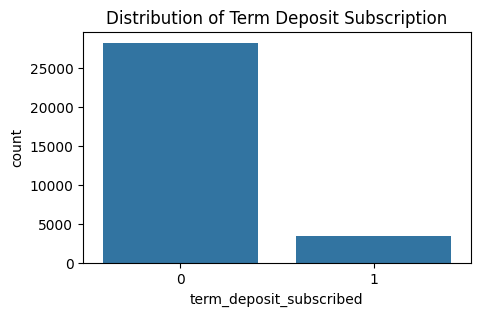

In [207]:
# Visualizations
plt.figure(figsize=(5,3))
sns.countplot(x='term_deposit_subscribed', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.show()

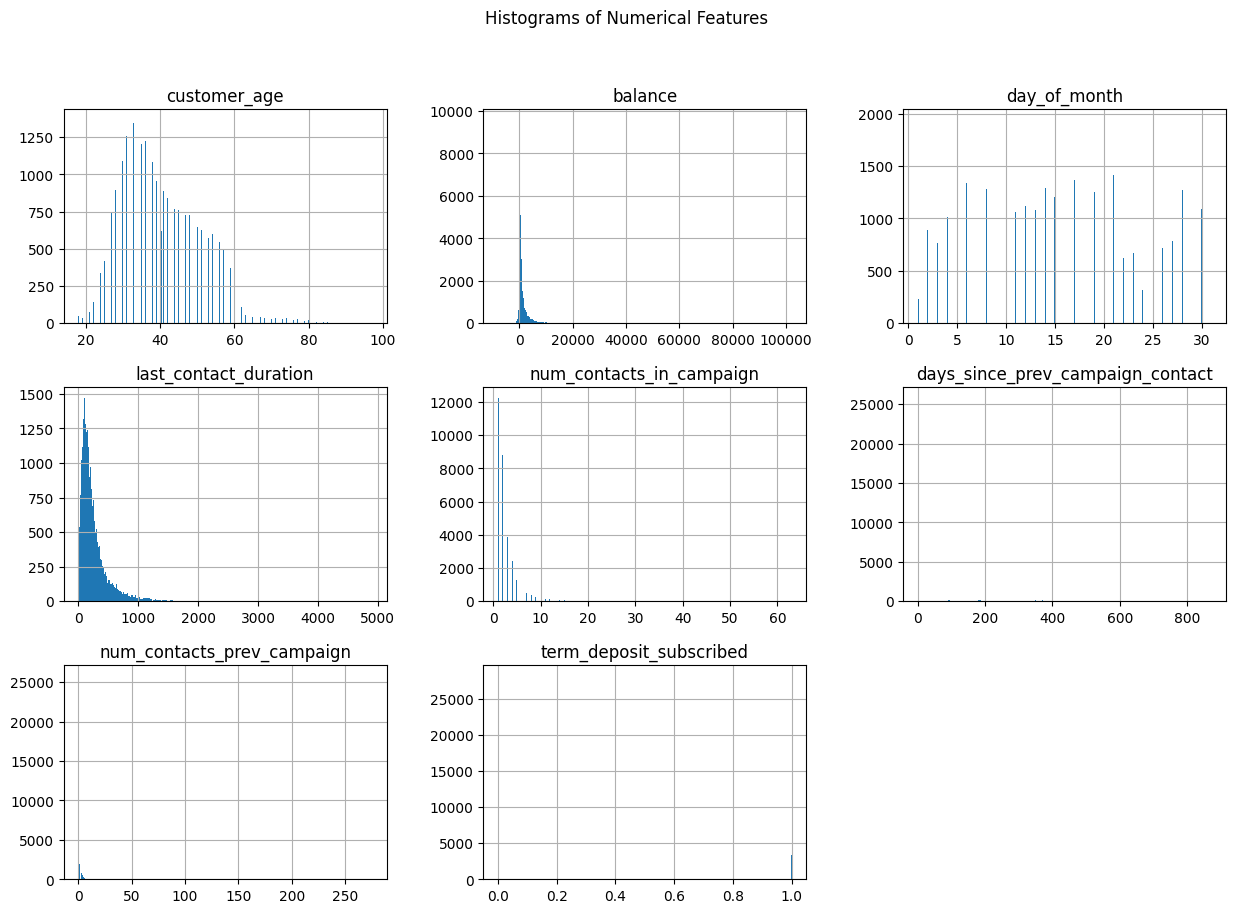

In [208]:
# Numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=400, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31647 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31647 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31647 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31647 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [210]:
categorical_features = df.select_dtypes(include=['object']).columns

c:\Users\USER\anaconda3\envs\CPU_AI06\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


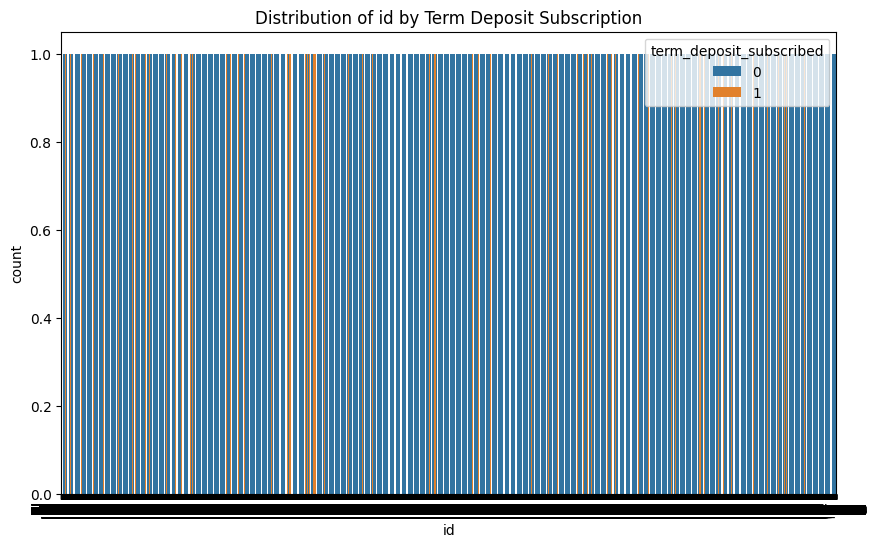

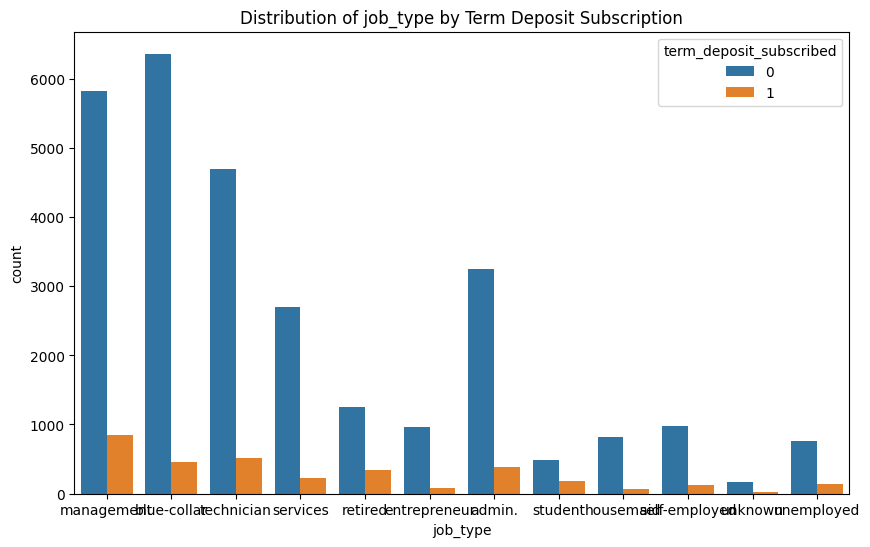

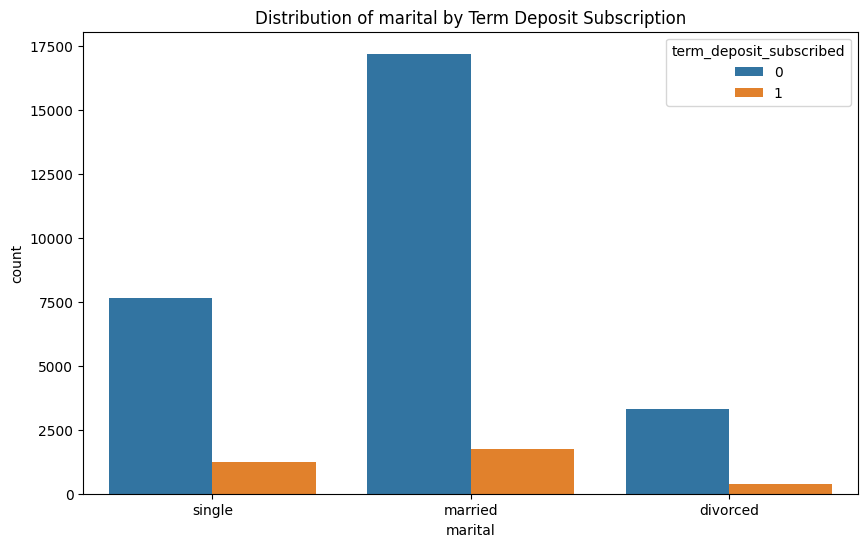

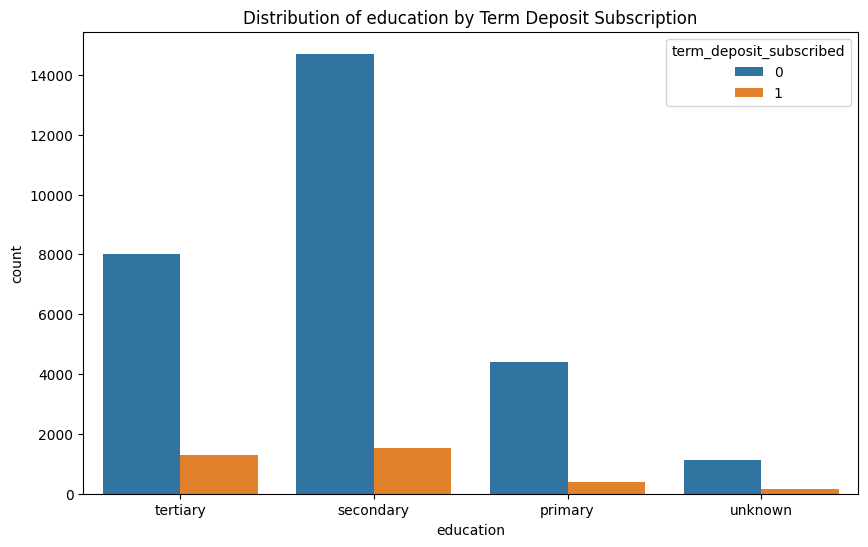

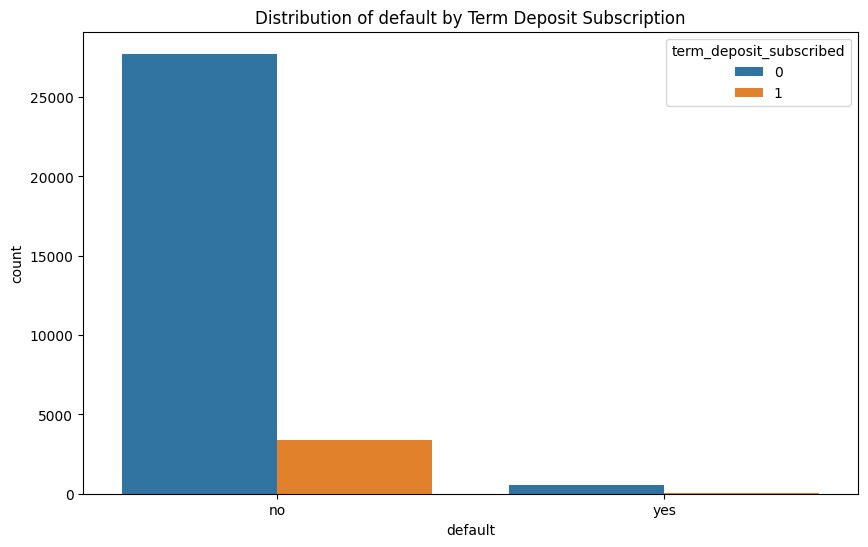

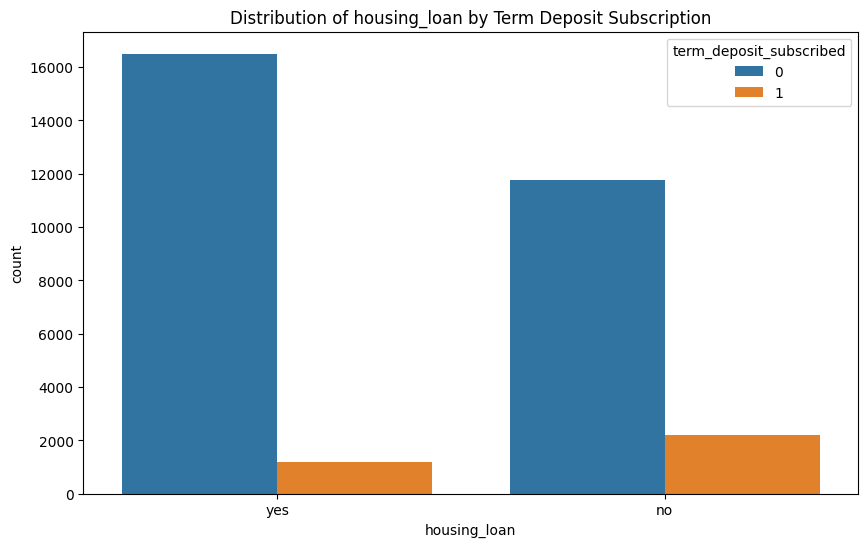

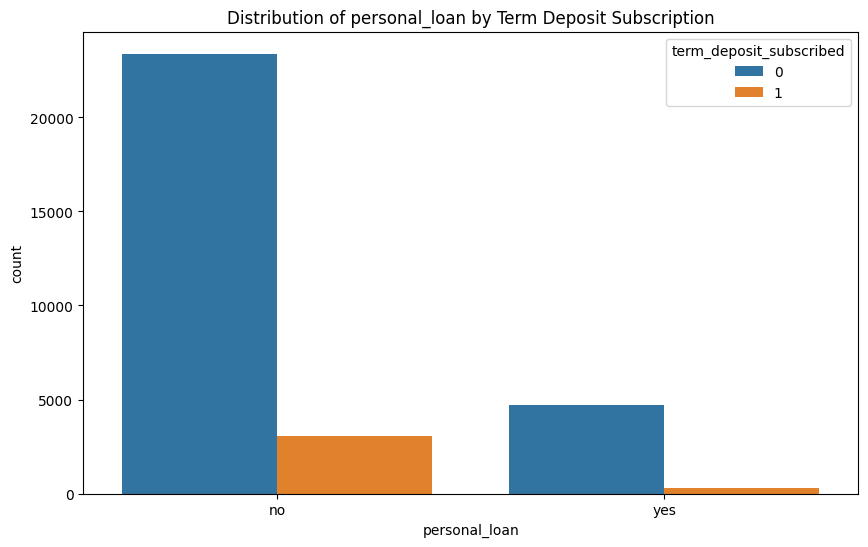

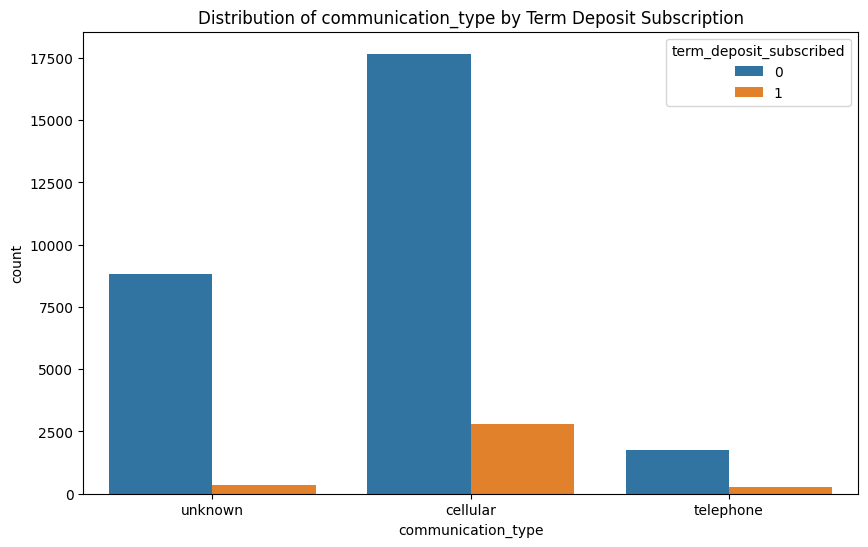

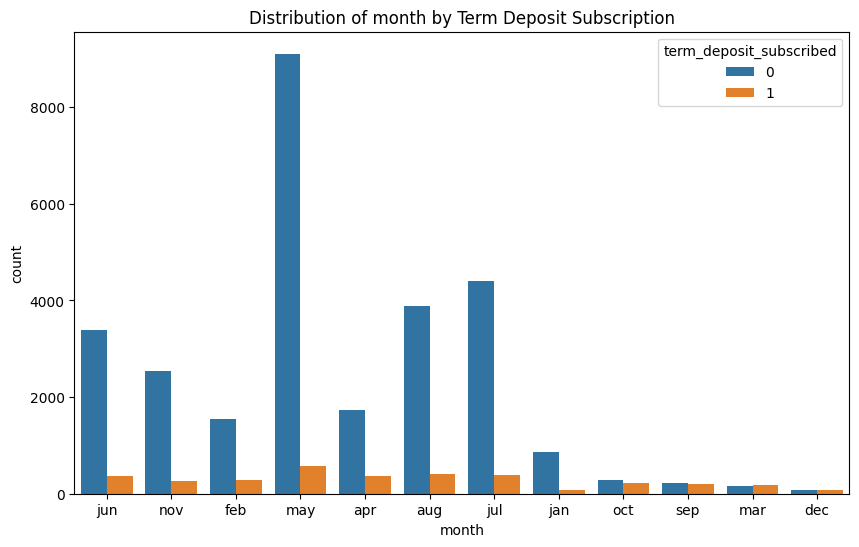

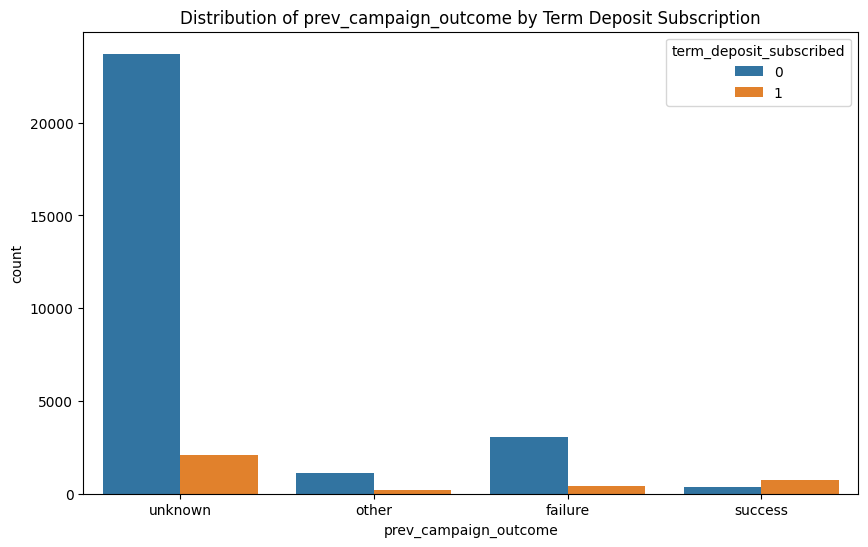

In [10]:
# Categorical features
categorical_features = df[['id', 'job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome']]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, hue='term_deposit_subscribed')
    plt.title(f'Distribution of {feature} by Term Deposit Subscription')
    plt.show()

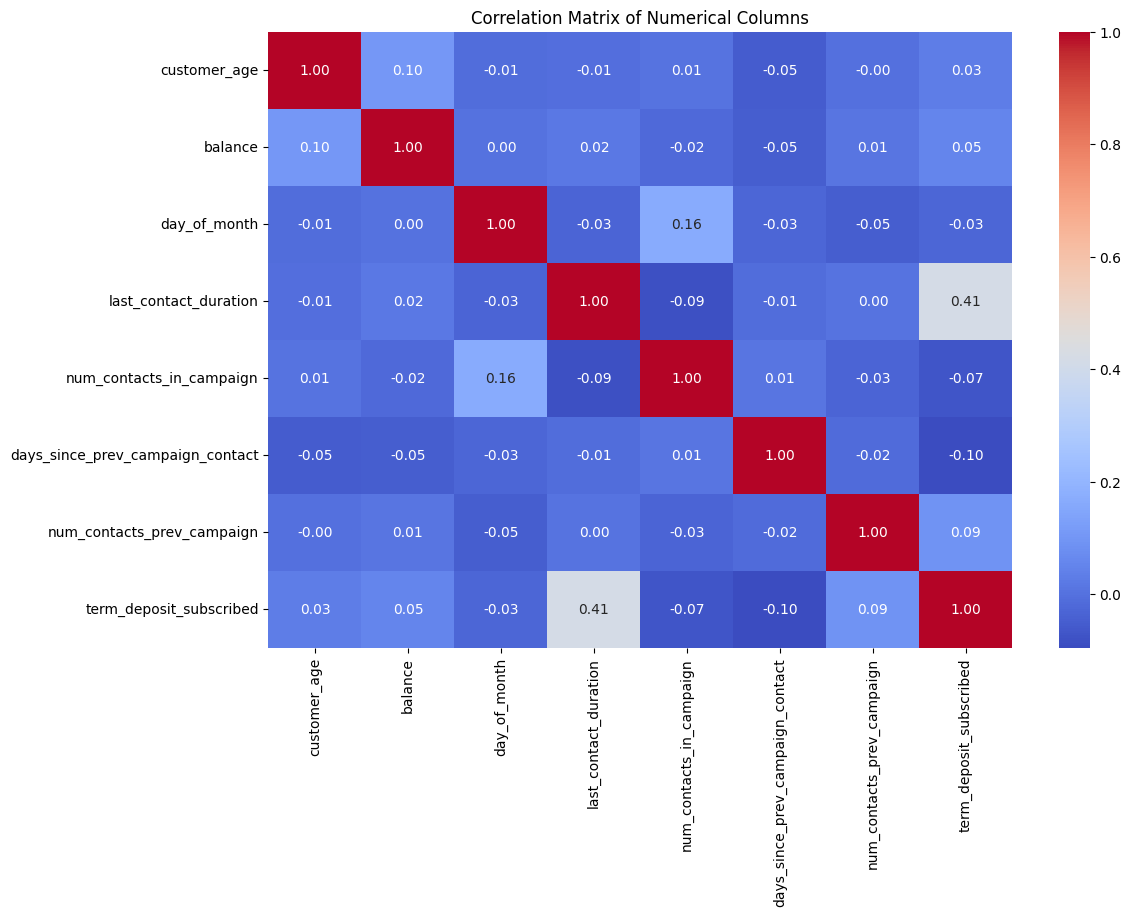

In [211]:
# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

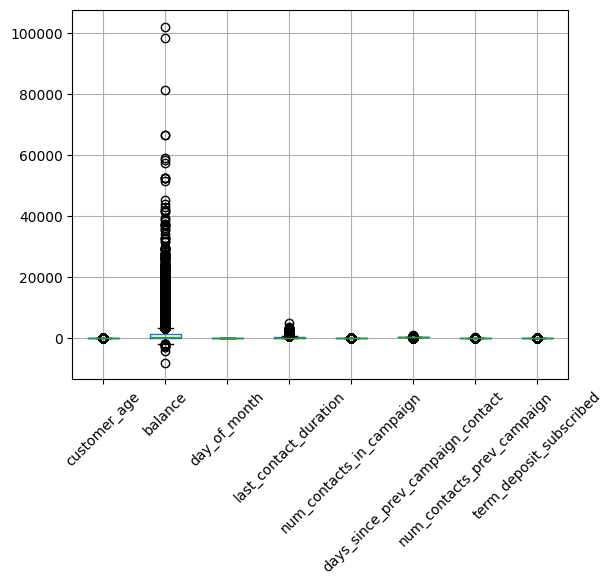

In [212]:
ax = df.boxplot()
plt.xticks(rotation=45)
plt.show()
# need to scale

In [213]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

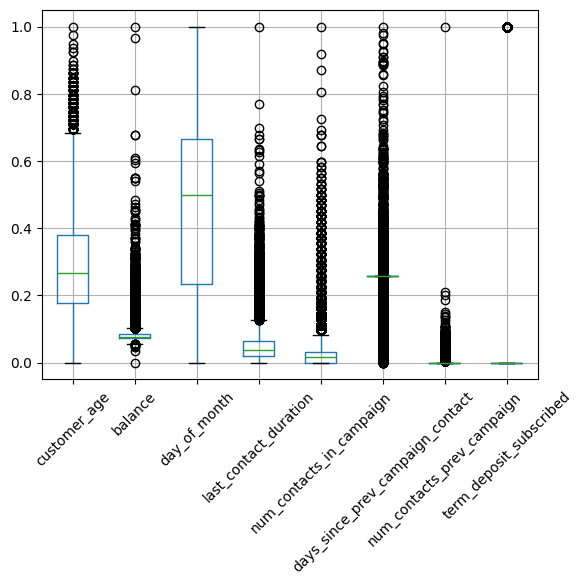

In [214]:
ax = df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [215]:
# Define the LabelEncoder object 
label_encoder = LabelEncoder()

# Apply label encoding to the entire dataset
df['education'] = label_encoder.fit_transform(df['education'])
df['month'] = label_encoder.fit_transform(df['month'])

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['job_type', 'marital', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'prev_campaign_outcome'])

# Separate features and target variable
X = df.drop(["term_deposit_subscribed", "id"], axis=1)
y = df["term_deposit_subscribed"]


In [216]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

# Print class distribution before resampling
print("Class distribution before resampling:", Counter(y_train))

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print class distribution after resampling
print("Class distribution after oversampling:", Counter(y_resampled_over))



Class distribution before resampling: Counter({1: 22605, 0: 22599})
Class distribution after oversampling: Counter({0.0: 22561, 1.0: 22561})


In [217]:
print(X_train.dtypes)
print(X_test.dtypes)

customer_age                        float64
education                             int32
balance                             float64
day_of_month                        float64
month                                 int32
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign          float64
job_type_admin.                        bool
job_type_blue-collar                   bool
job_type_entrepreneur                  bool
job_type_housemaid                     bool
job_type_management                    bool
job_type_retired                       bool
job_type_self-employed                 bool
job_type_services                      bool
job_type_student                       bool
job_type_technician                    bool
job_type_unemployed                    bool
job_type_unknown                       bool
marital_divorced                       bool
marital_married                 

In [218]:
# 4. Model development

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [229]:
# Convert features to numeric types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Convert target variable to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TensorBoard callback for logging training process
PATH = os.getcwd()
logpath = os.path.join(PATH, "tensorboard_log", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(logpath)

In [219]:
#5. Training
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, tensorboard]
)

Epoch 1/50
707/707 [==============================] - 5s 4ms/step - loss: 0.6542 - accuracy: 0.6507 - val_loss: 0.5194 - val_accuracy: 0.7634
Epoch 2/50
707/707 [==============================] - 4s 5ms/step - loss: 0.4547 - accuracy: 0.7933 - val_loss: 0.3685 - val_accuracy: 0.8429
Epoch 3/50
707/707 [==============================] - 2s 4ms/step - loss: 0.3974 - accuracy: 0.8313 - val_loss: 0.3633 - val_accuracy: 0.8475
Epoch 4/50
707/707 [==============================] - 2s 4ms/step - loss: 0.3881 - accuracy: 0.8391 - val_loss: 0.3521 - val_accuracy: 0.8538
Epoch 5/50
707/707 [==============================] - 3s 4ms/step - loss: 0.3790 - accuracy: 0.8447 - val_loss: 0.3481 - val_accuracy: 0.8560
Epoch 6/50
707/707 [==============================] - 2s 4ms/step - loss: 0.3704 - accuracy: 0.8484 - val_loss: 0.3547 - val_accuracy: 0.8486
Epoch 7/50
707/707 [==============================] - 2s 3ms/step - loss: 0.3651 - accuracy: 0.8504 - val_loss: 0.3421 - val_accuracy: 0.8577
Epoch 

In [228]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

354/354 [==============================] - 1s 3ms/step - loss: 0.3063 - accuracy: 0.8791
Test Loss: 0.30634623765945435
Test Accuracy: 0.8791364431381226


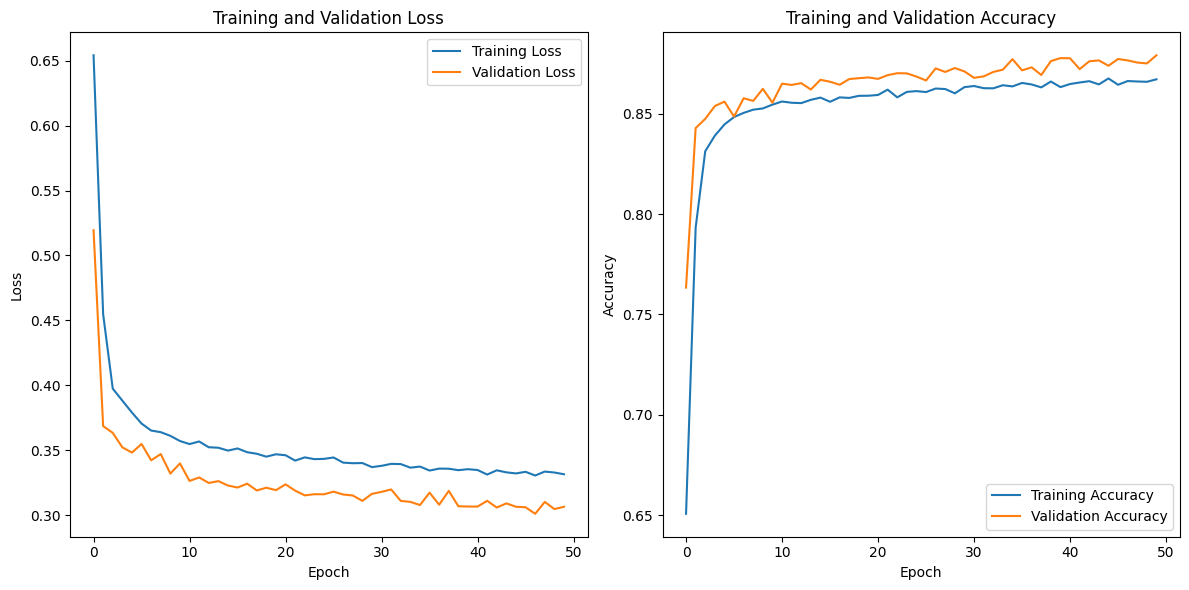

In [221]:
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


354/354 [==============================] - 1s 1ms/step


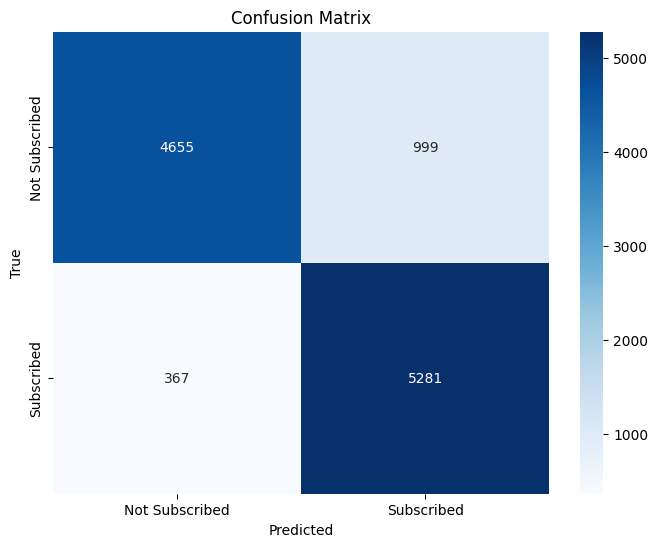

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model predictions are stored in y_pred
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [223]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5654
           1       0.84      0.94      0.89      5648

    accuracy                           0.88     11302
   macro avg       0.88      0.88      0.88     11302
weighted avg       0.88      0.88      0.88     11302



In [224]:
# Save the model
model.save('term_deposit_model.h5')


c:\Users\USER\anaconda3\envs\CPU_AI06\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [225]:

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

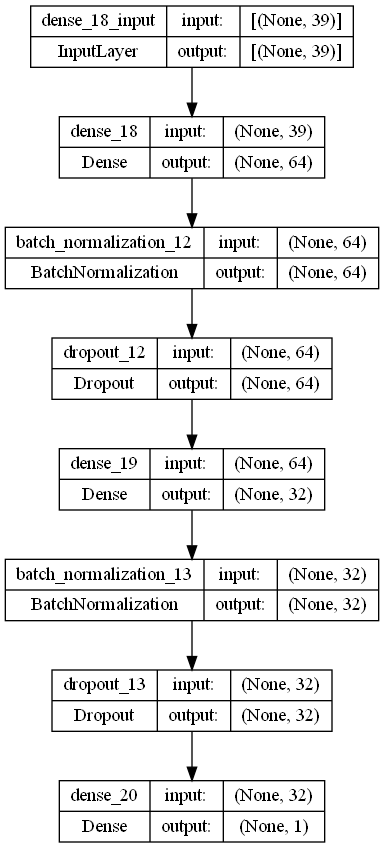

In [227]:
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model'
plot_model(model, to_file='model_architecture.png', show_shapes=True)